# Importing libraires

In [111]:
!pip install heartpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.0 MB 1.7 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.0 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.0 MB 2.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.0 MB 2.7 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 2.9 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 2.7 MB/s eta 0:00:01
   -------------------------------- ------- 0.8/1.0 MB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 0.9/1.0 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 2.4 MB/s eta 0:00:00


In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import scipy.signal as sp_signal
from scipy.signal import butter, filtfilt, detrend, iirnotch, savgol_filter
from scipy.signal import find_peaks, butter

# Loading raw data
Finding the file name from the name and put them in data sets based on if they have ppg or ecg in their name file

In [790]:
def load_signals_from_folder(folder_path):
    signals = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.npy'):
            file_path = os.path.join(folder_path, file_name)
            signals.append(np.load(file_path))
    return signals

ecg_folder_path = r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg'
ppg_folder_path = r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg'

#Creating data set for every signal sample seprately
ecg_signal_1 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg\first_ecg.npy')
ecg_signal_2 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg\second_ecg.npy')
ecg_signal_3 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg\third_ecg.npy')

ppg_signal_1 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg\first_ppg.npy')
ppg_signal_2 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg\second_ppg.npy')
ppg_signal_3 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg\third_ppg.npy')

In [791]:
print(ecg_signal_1)
print(ppg_signal_1)

[290 292 290 ... -47 -50 -50]
[-580.71330054 -591.83564815 -590.77883873 ... -171.72853974 -171.57175926
 -171.47588735]


In [792]:
signals = {
    'ecg_signal_1': ecg_signal_1,
    'ecg_signal_2': ecg_signal_2,
    'ecg_signal_3': ecg_signal_3,
    'ppg_signal_1': ppg_signal_1,
    'ppg_signal_2': ppg_signal_2,
    'ppg_signal_3': ppg_signal_3
}

for name, signal in signals.items():
    missing_values_count = np.isnan(signal).sum()
    print(f"Missing values in {name}: {missing_values_count}")

Missing values in ecg_signal_1: 0
Missing values in ecg_signal_2: 0
Missing values in ecg_signal_3: 0
Missing values in ppg_signal_1: 0
Missing values in ppg_signal_2: 0
Missing values in ppg_signal_3: 0


No missing values in data

# Overview of visulization for analysis befroe 

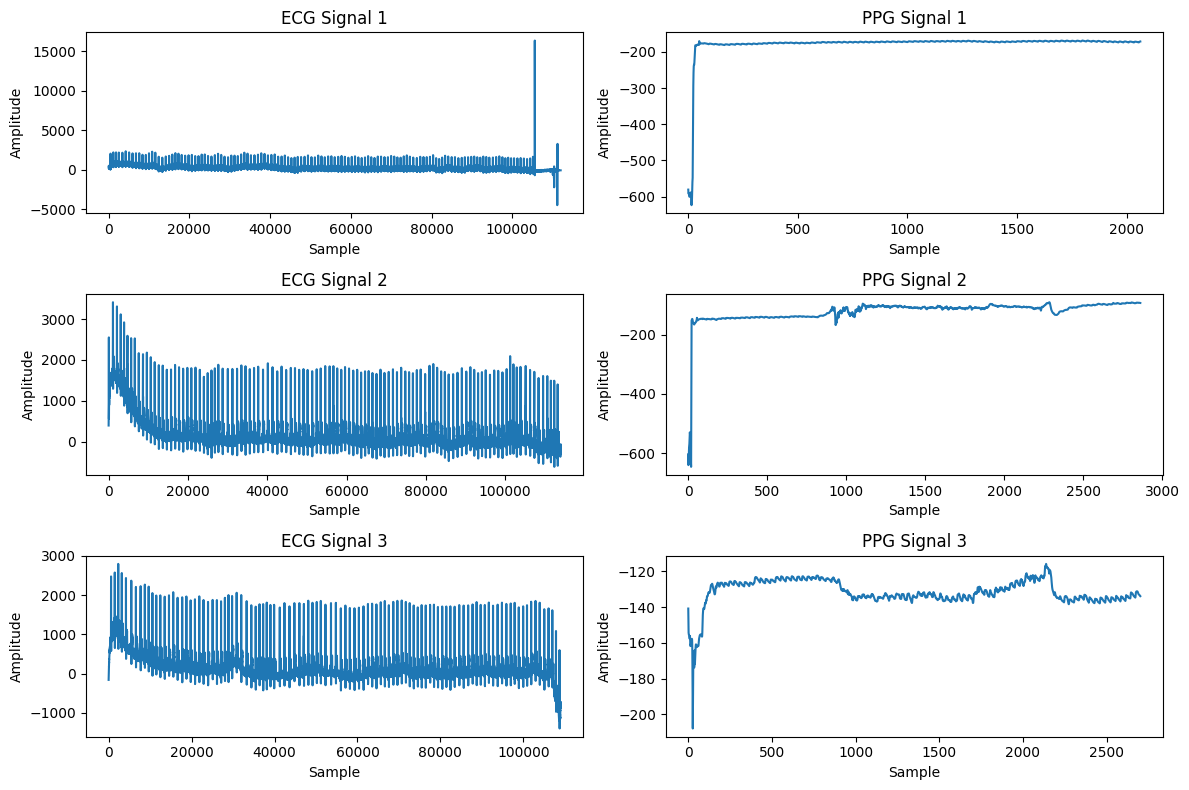

In [793]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(ecg_signal_1)
plt.title('ECG Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(ecg_signal_2)
plt.title('ECG Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(ecg_signal_3)
plt.title('ECG Signal 3')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot PPG signals for visual inspection
plt.subplot(3, 2, 2)
plt.plot(ppg_signal_1)
plt.title('PPG Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(ppg_signal_2)
plt.title('PPG Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
plt.plot(ppg_signal_3)
plt.title('PPG Signal 3')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Zoom in samples in ECG between signal 40000 to 50000 & zoom in PPG signal 1000 to 1500

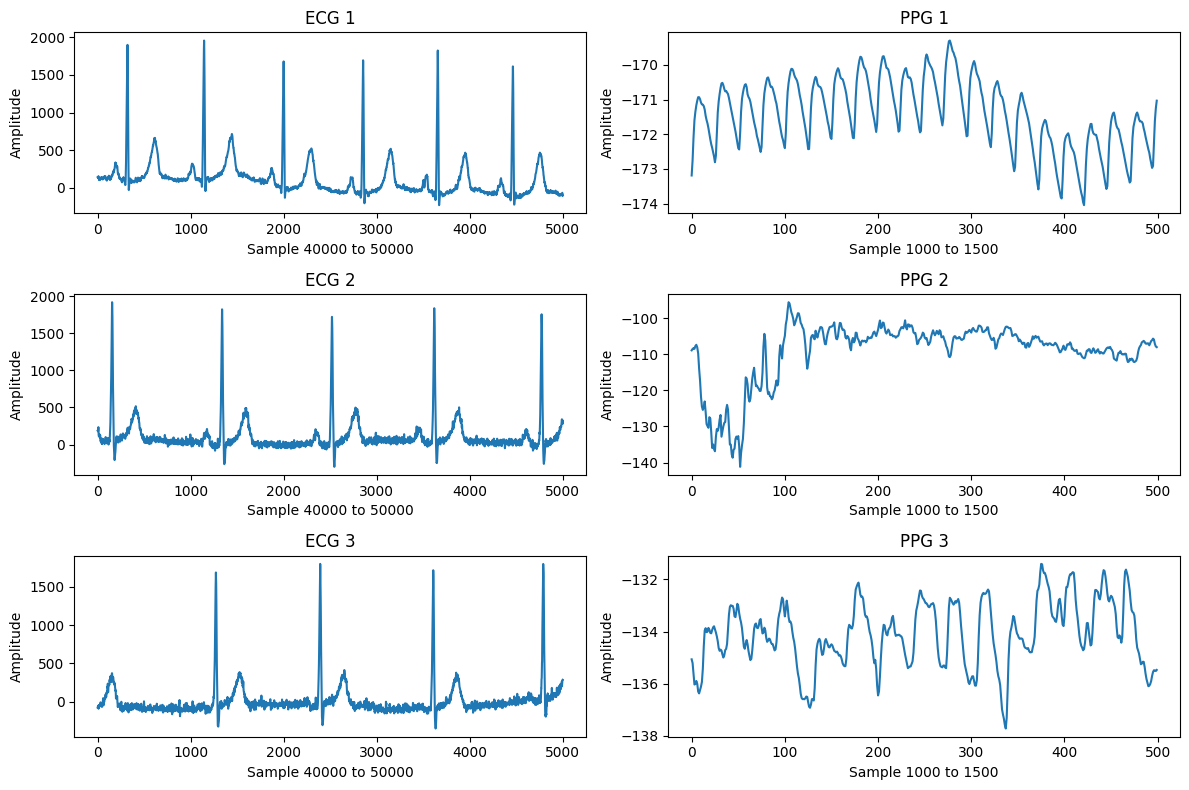

In [794]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(ecg_signal_1[40000:45000])
plt.title('ECG 1')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(ecg_signal_2[40000:45000])
plt.title('ECG 2')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(ecg_signal_3[40000:45000])
plt.title('ECG 3')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

# Plot PPG signals for visual inspection
plt.subplot(3, 2, 2)
plt.plot(ppg_signal_1[1000:1500])
plt.title('PPG 1')
plt.xlabel('Sample 1000 to 1500')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(ppg_signal_2[1000:1500])
plt.title('PPG 2')
plt.xlabel('Sample 1000 to 1500')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
plt.plot(ppg_signal_3[1000:1500])
plt.title('PPG 3')
plt.xlabel('Sample 1000 to 1500')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Preprocessing

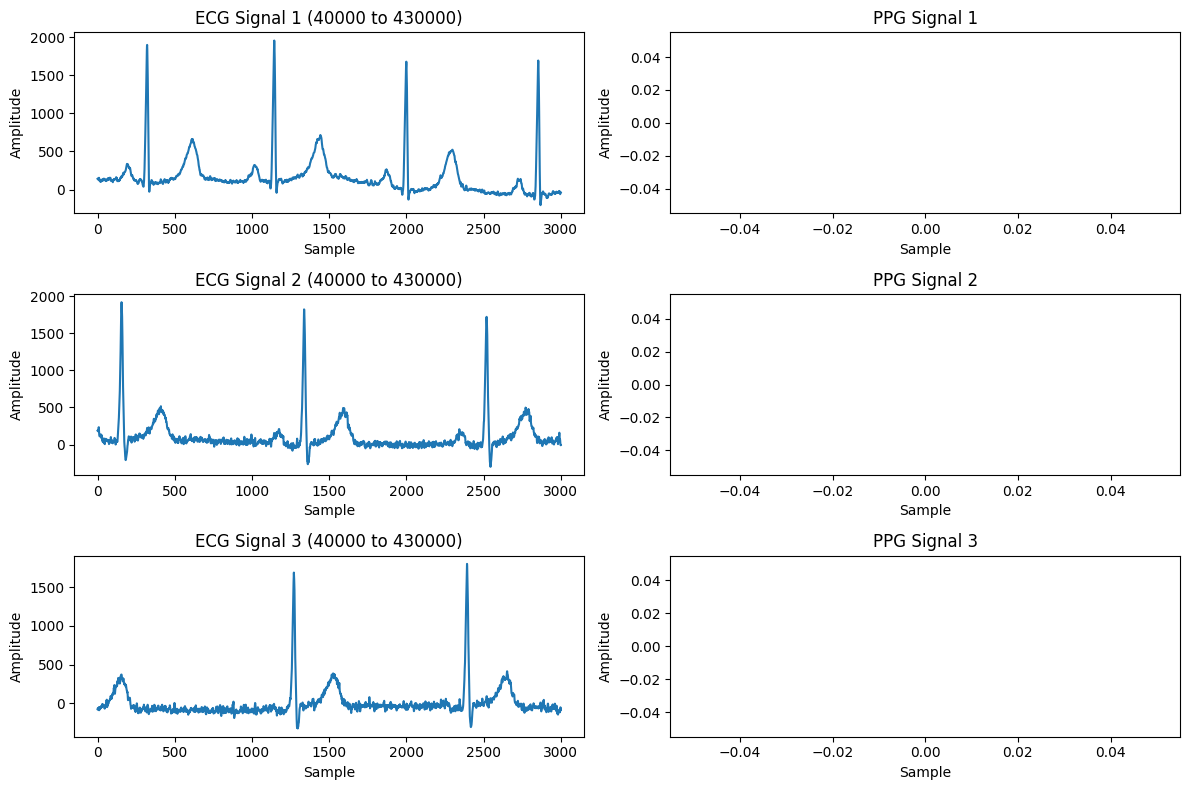

In [795]:
plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(ecg_signals[i][40000:43000])
    plt.title(f'ECG Signal {i+1} (40000 to 430000)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(3, 2, 2*i + 2)
    plt.plot(ppg_signals[i][40000:50000])
    plt.title(f'PPG Signal {i+1}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Removing high frequency noise, offset and trend

In [796]:
def process_signal(input_signal, sampling_rate, lowcut, highcut, order=5):
    # Filtering (Butterworth bandpass filter)
    sos = sp_signal.butter(order, [lowcut, highcut], btype='bandpass', output='sos', fs=sampling_rate)
    filtered_signal = sp_signal.sosfiltfilt(sos, input_signal)

    # Normalization (Z-score normalization)
    normalized_signal = (filtered_signal - np.mean(filtered_signal)) / np.std(filtered_signal)

    # Detrending (Baseline correction)
    detrended_signal = sp_signal.detrend(normalized_signal)

    return detrended_signal

# Parameters for ECG and PPG signals
ecg_sampling_rate = 300
ecg_lowcut = 0.5
ecg_highcut = 50

ppg_sampling_rate = 125
ppg_lowcut = 0.5
ppg_highcut = 5

# Process ECG signals
ecg_signals = [ecg_signal_1, ecg_signal_2, ecg_signal_3]
ecg_signals_processed = [process_signal(ecg, ecg_sampling_rate, ecg_lowcut, ecg_highcut) for ecg in ecg_signals]

# Process PPG signals
ppg_signals = [ppg_signal_1, ppg_signal_2, ppg_signal_3]
ppg_signals_processed = [process_signal(ppg, ppg_sampling_rate, ppg_lowcut, ppg_highcut) for ppg in ppg_signals]

# Extract processed signals
ecg_signal_1_processed = ecg_signals_processed[0]
ecg_signal_2_processed = ecg_signals_processed[1]
ecg_signal_3_processed = ecg_signals_processed[2]

ppg_signal_1_processed = ppg_signals_processed[0]
ppg_signal_2_processed = ppg_signals_processed[1]
ppg_signal_3_processed = ppg_signals_processed[2]

# Visualization After Preprocessing

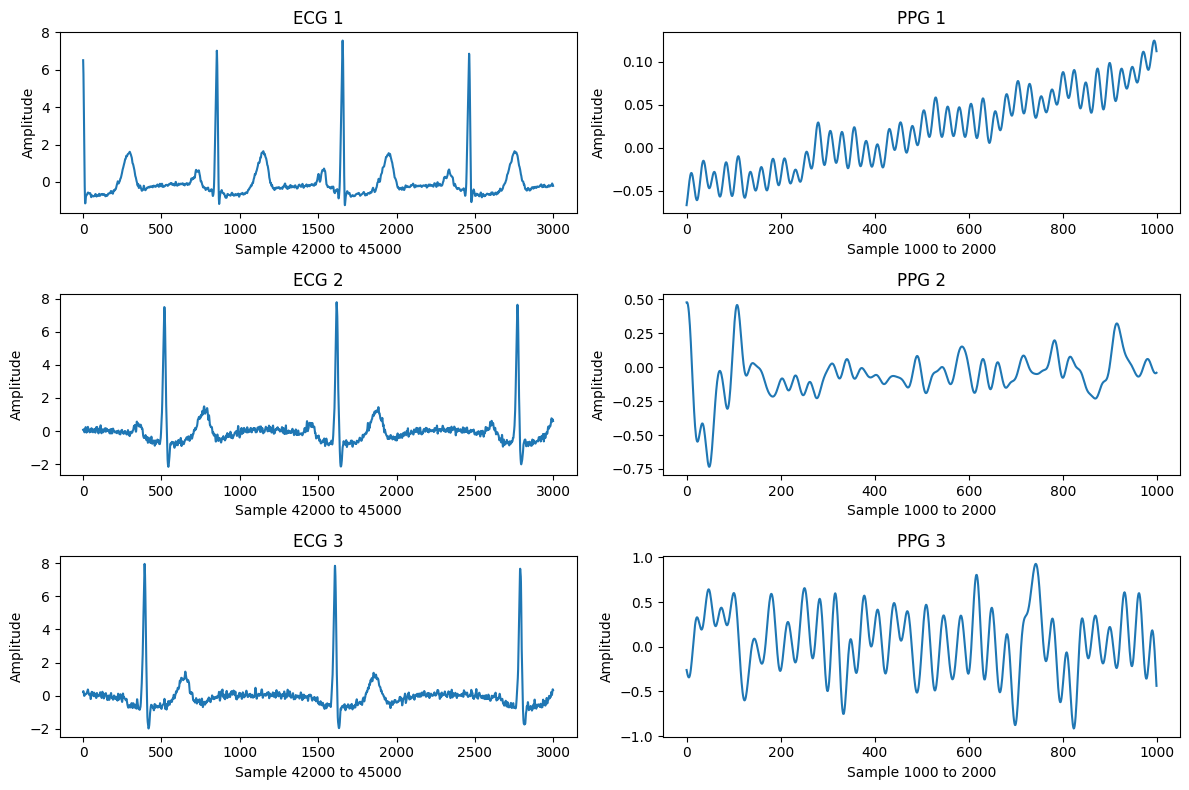

In [797]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(ecg_signal_1_processed[42000:45000])
plt.title('ECG 1')
plt.xlabel('Sample 42000 to 45000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(ecg_signal_2_processed[42000:45000])
plt.title('ECG 2')
plt.xlabel('Sample 42000 to 45000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(ecg_signal_3_processed[42000:45000])
plt.title('ECG 3')
plt.xlabel('Sample 42000 to 45000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.plot(ppg_signal_1_processed[1000:2000])
plt.title('PPG 1')
plt.xlabel('Sample 1000 to 2000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(ppg_signal_2_processed[1000:2000])
plt.title('PPG 2')
plt.xlabel('Sample 1000 to 2000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
plt.plot(ppg_signal_3_processed[1000:2000])
plt.title('PPG 3')
plt.xlabel('Sample 1000 to 2000')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show();

Signals have trend and noise and also part of important nomalization to filter their signals so need to use filtration and correct the base line trend and reduce the noise 

# Detecting the pulse locations in both signals.

## Peaks in ECG

In [798]:
def detect_ecg_peaks(ecg_signal, fs):
    distance = fs // 2       # Minimum distance between peaks (approximately half the average beat-to-beat interval)
    prominence = 0.5         # Minimum prominence of peaks
    peaks, _ = find_peaks(ecg_signal, distance=distance, prominence=prominence)
    return peaks

ecg_peaks_1 = detect_ecg_peaks(ecg_signal_1_processed, ecg_sampling_rate)
ecg_peaks_2 = detect_ecg_peaks(ecg_signal_2_processed, ecg_sampling_rate)
ecg_peaks_3 = detect_ecg_peaks(ecg_signal_3_processed, ecg_sampling_rate)

## Peaks in PPG

In [799]:
def detect_ppg_peaks(ppg_signal, fs):
    ppg_inverted = -ppg_signal
    distance = fs // 2       # Minimum distance between peaks (approximately half the average beat-to-beat interval)
    prominence = 0.1         # Minimum prominence of peaks
    peaks, _ = find_peaks(ppg_inverted, distance=distance, prominence=prominence)
    return peaks

ppg_peaks_1 = detect_ppg_peaks(ppg_signal_1_processed, ppg_sampling_rate)
ppg_peaks_2 = detect_ppg_peaks(ppg_signal_2_processed, ppg_sampling_rate)
ppg_peaks_3 = detect_ppg_peaks(ppg_signal_3_processed, ppg_sampling_rate)

## visualize the detected peaks in ECG and PPG

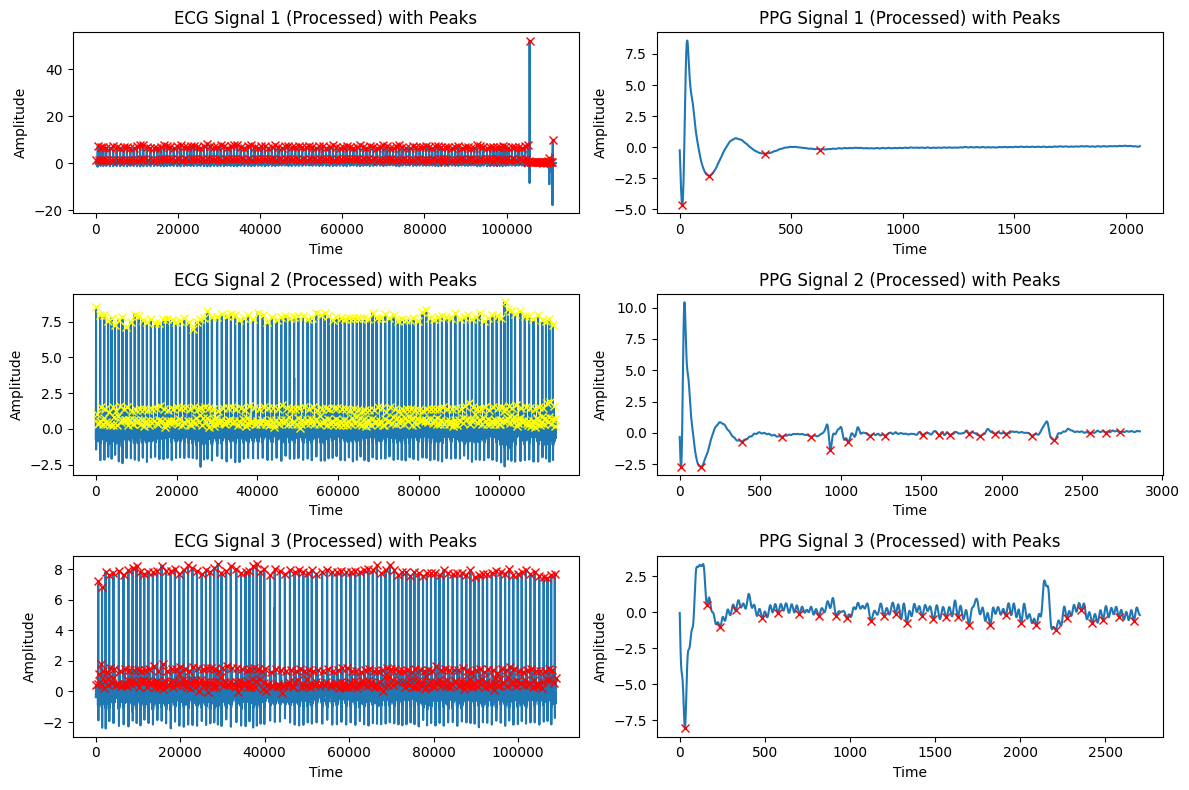

In [800]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(ecg_signal_1_processed)
plt.plot(ecg_peaks_1, ecg_signal_1_processed[ecg_peaks_1], "x", color='red')
plt.title('ECG Signal 1 (Processed) with Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# ECG Signal 2
plt.subplot(3, 2, 3)
plt.plot(ecg_signal_2_processed)
plt.plot(ecg_peaks_2, ecg_signal_2_processed[ecg_peaks_2], "x", color='yellow')
plt.title('ECG Signal 2 (Processed) with Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# ECG Signal 3
plt.subplot(3, 2, 5)
plt.plot(ecg_signal_3_processed)
plt.plot(ecg_peaks_3, ecg_signal_3_processed[ecg_peaks_3], "x", color='red')
plt.title('ECG Signal 3 (Processed) with Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# PPG Signal 1
plt.subplot(3, 2, 2)
plt.plot(ppg_signal_1_processed)
plt.plot(ppg_peaks_1, ppg_signal_1_processed[ppg_peaks_1], "x", color='red')
plt.title('PPG Signal 1 (Processed) with Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# PPG Signal 2
plt.subplot(3, 2, 4)
plt.plot(ppg_signal_2_processed)
plt.plot(ppg_peaks_2, ppg_signal_2_processed[ppg_peaks_2], "x", color='red')
plt.title('PPG Signal 2 (Processed) with Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# PPG Signal 3
plt.subplot(3, 2, 6)
plt.plot(ppg_signal_3_processed)
plt.plot(ppg_peaks_3, ppg_signal_3_processed[ppg_peaks_3], "x", color='red')
plt.title('PPG Signal 3 (Processed) with Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Detect anomalies

In [801]:
def detect_anomalies(ppg_signal, peaks, fs):
    anomalies = []
    ibi = np.diff(peaks) / fs  # Inter-Beat Interval in seconds
    mean_ibi = np.mean(ibi)
    std_ibi = np.std(ibi)

    # IBI anomalies (deviation more than 3 standard deviations from the mean)
    ibi_anomalies = np.where(np.abs(ibi - mean_ibi) > 3 * std_ibi)[0]

    # Z-score anomalies (z-score more than 3)
    z_scores = np.abs((ppg_signal - np.mean(ppg_signal)) / np.std(ppg_signal))
    z_score_anomalies = np.where(z_scores > 3)[0]

    anomalies.extend(peaks[ibi_anomalies])  # Adding IBI anomalies based on peaks
    anomalies.extend(z_score_anomalies)     # Adding z-score anomalies directly

    return np.unique(anomalies)

# Detect anomalies in each PPG signal
anomalies_ppg_1 = detect_anomalies(ppg_signals_processed[0], ppg_peaks_1, ppg_sampling_rate)
anomalies_ppg_2 = detect_anomalies(ppg_signals_processed[1], ppg_peaks_2, ppg_sampling_rate)
anomalies_ppg_3 = detect_anomalies(ppg_signals_processed[2], ppg_peaks_3, ppg_sampling_rate)

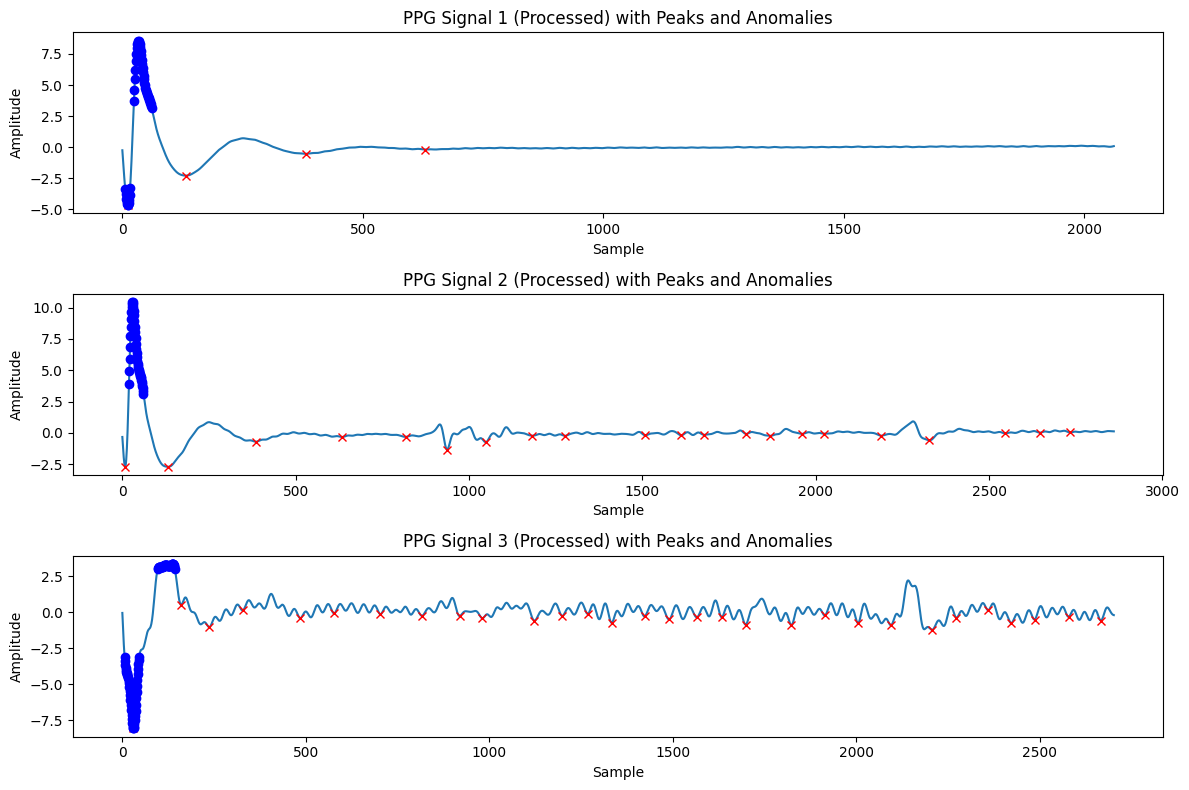

In [802]:
# Plotting processed PPG signals with anomalies
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(ppg_signals_processed[0])
plt.plot(ppg_peaks_1, ppg_signals_processed[0][ppg_peaks_1], "x", color='red')
plt.plot(anomalies_ppg_1, ppg_signals_processed[0][anomalies_ppg_1], "o", color='blue')
plt.title('PPG Signal 1 (Processed) with Peaks and Anomalies')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(ppg_signals_processed[1])
plt.plot(ppg_peaks_2, ppg_signals_processed[1][ppg_peaks_2], "x", color='red')
plt.plot(anomalies_ppg_2, ppg_signals_processed[1][anomalies_ppg_2], "o", color='blue')
plt.title('PPG Signal 2 (Processed) with Peaks and Anomalies')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(ppg_signals_processed[2])
plt.plot(ppg_peaks_3, ppg_signals_processed[2][ppg_peaks_3], "x", color='red')
plt.plot(anomalies_ppg_3, ppg_signals_processed[2][anomalies_ppg_3], "o", color='blue')
plt.title('PPG Signal 3 (Processed) with Peaks and Anomalies')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Syncing ECG and PPG

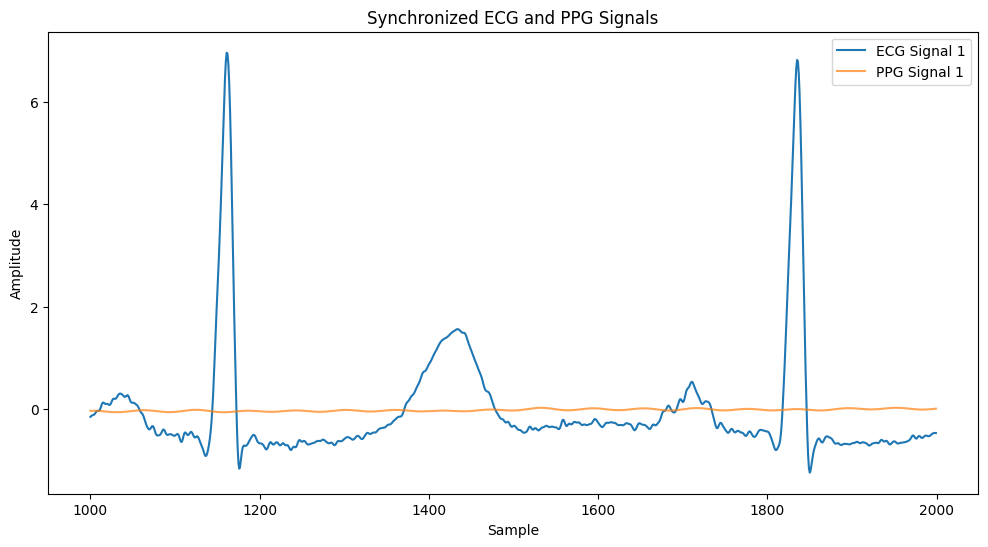

In [803]:
def synchronize_signals(ecg_signal, ppg_signal, ecg_peaks, ppg_peaks, ecg_fs, ppg_fs):
    # Resample the PPG signal to match the ECG sampling rate
    resampled_ppg_signal = sp_signal.resample(ppg_signal, int(len(ppg_signal) * ecg_fs / ppg_fs))
    
    # Find the lag using cross-correlation
    correlation = np.correlate(ecg_signal, resampled_ppg_signal, mode='full')
    lag = np.argmax(correlation) - len(ecg_signal) + 1
    
    # Align the signals based on the lag
    if lag > 0:
        aligned_ppg_signal = np.pad(resampled_ppg_signal, (lag, 0), mode='constant')[:len(ecg_signal)]
    else:
        aligned_ppg_signal = resampled_ppg_signal[-lag:len(ecg_signal)-lag]
    
    return aligned_ppg_signal

aligned_ppg_signal_1 = synchronize_signals(ecg_signals_processed[0], ppg_signals_processed[0], ecg_peaks_1, ppg_peaks_1, ecg_sampling_rate, ppg_sampling_rate)

plt.figure(figsize=(12, 6))

# Select a range to plot for better visualization
plot_range = range(1000, 2000)

plt.plot(plot_range, ecg_signals_processed[0][plot_range], label='ECG Signal 1')
plt.plot(plot_range, aligned_ppg_signal_1[plot_range], label='PPG Signal 1', alpha=0.7)
plt.title('Synchronized ECG and PPG Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# Signal-to-Noise Ratio (SNR) for Ordering the three PPG signals

In [804]:
import scipy.signal as sp_signal

def process_signal(input_signal, sampling_rate, lowcut, highcut, order=5):
    # Bandpass Filtering (Butterworth bandpass filter)
    sos_bandpass = sp_signal.butter(order, [lowcut, highcut], btype='bandpass', output='sos', fs=sampling_rate)
    bandpass_filtered_signal = sp_signal.sosfiltfilt(sos_bandpass, input_signal)

    # High-pass filtering for baseline correction
    highpass_cutoff = 0.5  # 0.5 Hz high-pass filter
    sos_highpass = sp_signal.butter(order, highpass_cutoff, btype='highpass', output='sos', fs=sampling_rate)
    highpass_filtered_signal = sp_signal.sosfiltfilt(sos_highpass, bandpass_filtered_signal)

    return highpass_filtered_signal

ppg_sampling_rate = 125
ppg_lowcut = 0.5
ppg_highcut = 5

# Process PPG signals
ppg_signals = [ppg_signal_1, ppg_signal_2, ppg_signal_3]
ppg_signals_processed = [process_signal(ppg, ppg_sampling_rate, ppg_lowcut, ppg_highcut) for ppg in ppg_signals]

# Function to calculate SNR
def calculate_snr(signal):
    mean_signal = np.mean(signal)
    std_signal = np.std(signal)
    return mean_signal / std_signal

# Evaluate each PPG signal
snr_scores = [calculate_snr(ppg_signal) for ppg_signal in ppg_signals_processed]

# Rank the PPG signals from best to worst
sorted_indices = np.argsort(snr_scores)[::-1]

# Print the ranking
print("PPG Signals ranked from best to worst based on SNR:")
for rank, index in enumerate(sorted_indices):
    print(f"Rank {rank + 1}: PPG Signal {index + 1} (SNR Score: {snr_scores[index]:.2f})")


PPG Signals ranked from best to worst based on SNR:
Rank 1: PPG Signal 2 (SNR Score: 0.03)
Rank 2: PPG Signal 1 (SNR Score: 0.00)
Rank 3: PPG Signal 3 (SNR Score: -0.06)


Based on SNR, the PPG signals ranked from best to worst are: 2, 1, 3.